In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
# Read the file
df = pd.read_csv(r'C:\Users\praja\OneDrive\Desktop\Oakland\Study Material\Fall Courses\Machine Learning\Project\Dataset\WalmartWithPostal.csv')
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Postal Code  
0  211.096358         8.106      42420.0  
1  211.242170         8.106      42420.0  
2  211.289143         8.106      90036.0  
3  211.319643         8.106      33311.0  
4  211.350143         8.106      33311.0  


In [7]:
# Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Postal Code     2
dtype: int64


In [9]:
# Display column names
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Postal Code'],
      dtype='object')


In [10]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Postal Code     float64
dtype: object


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
# Drop rows with missing Date values
df = df.dropna(subset=['Date'])
# Extract time-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Day_Name'] = df['Date'].dt.day_name()

# Print the updated DataFrame
print(df[['Date', 'Year', 'Month', 'Day', 'Weekday', 'Quarter', 'Week_of_Year', 'Day_Name']].head())


        Date  Year  Month  Day  Weekday  Quarter  Week_of_Year  Day_Name
0 2010-05-02  2010      5    2        6        2            17    Sunday
1 2010-12-02  2010     12    2        3        4            48  Thursday
4 2010-05-03  2010      5    3        0        2            18    Monday
5 2010-12-03  2010     12    3        4        4            48    Friday
8 2010-02-04  2010      2    4        3        1             5  Thursday


In [13]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Day_Name' column
le = LabelEncoder()
df['Day_Name'] = le.fit_transform(df['Day_Name'])

In [14]:
# Encode the 'Store' column as it's categorical
df['Store'] = df['Store'].astype('category')
df['Store'] = df['Store'].cat.codes  # Label encoding

In [15]:
# Drop the original Date column (now encoded in features)
df = df.drop(columns=['Date'])

print(df.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Postal Code', 'Year', 'Month', 'Day', 'Weekday',
       'Quarter', 'Week_of_Year', 'Day_Name'],
      dtype='object')


In [16]:
# Select all features except the target variable
X = df.drop(columns=['Weekly_Sales'])

# Set the target variable (y) as 'Weekly_Sales'
y = df['Weekly_Sales']

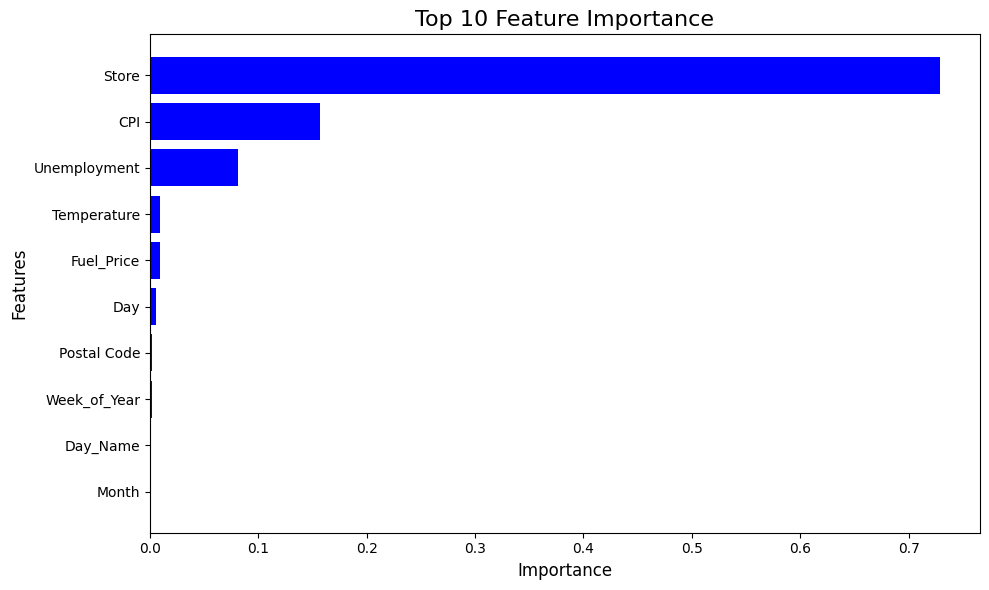

R2 Score (Test Set): 0.9769538855512221
RMSE (Test Set): 86608.16320360712
MSE (Test Set): 7500973933.502646
MAE (Test Set): 54120.5109263158


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation

# Train the model on the full training set
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Feature importance
importance = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='blue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()


# Print metrics
print(f"R2 Score (Test Set): {r2}")
print(f"RMSE (Test Set): {rmse}")
print(f"MSE (Test Set): {mse}")
print(f"MAE (Test Set): {mae}")
# print(f"Cross-Validation R2 Scores: {cv_scores}")
# print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")


In [18]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Re-evaluate with the tuned model
# Predict using the tuned model
y_pred_best = best_rf.predict(X_test)

# Calculate metrics
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print metrics
print(f"Tuned R² Score: {r2_best:.4f}")
print(f"Tuned MSE: {mse_best:.4f}")
print(f"Tuned RMSE: {rmse_best:.4f}")
print(f"Tuned MAE: {mae_best:.4f}")

C:\Users\praja\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned R² Score: 0.9778
Tuned MSE: 7220921763.4699
Tuned RMSE: 84976.0070
Tuned MAE: 53209.7973


Enter the year for which you want to view sales data:  2011


    Month   Actual Sales Predicted Sales
0       1  21,517,931.56   21,923,357.31
1       2  18,377,169.24   18,548,440.85
2       3   5,301,533.75    5,221,565.32
3       4  36,524,294.54   35,981,095.10
4       5   6,718,037.89    6,806,057.80
5       6   6,133,720.01    6,327,274.41
6       7  14,304,678.74   15,015,393.13
7       8  22,706,835.83   23,068,157.78
8       9  22,641,160.76   20,770,822.80
9      10   6,178,541.23    6,254,921.88
10     11  18,655,950.34   18,962,813.58
11     12   9,360,572.49    9,766,709.41


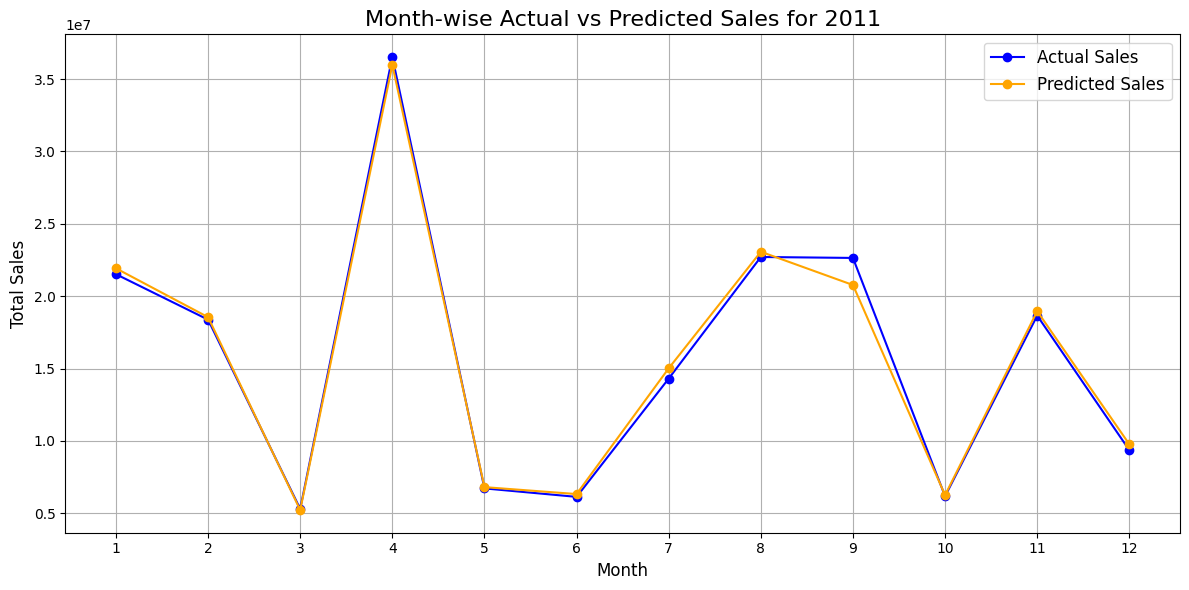

In [19]:
# Add month and year information to test data
X_test_with_date = X_test.copy()
X_test_with_date['Month'] = X.loc[X_test.index, 'Month']  # Use 'Month' from the original data
X_test_with_date['Year'] = X.loc[X_test.index, 'Year']    # Use 'Year' from the original data

# Combine predictions with the actual test data
results = pd.DataFrame({
    'Year': X_test_with_date['Year'],
    'Month': X_test_with_date['Month'],
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

# Take year as input from the user
input_year = int(input("Enter the year for which you want to view sales data: "))

# Filter data for the given year
yearly_results = results[results['Year'] == input_year]

# Check if there is data for the given year
if yearly_results.empty:
    print(f"No data available for the year {input_year}.")
else:
    # Group by month and calculate the sum of sales
    monthwise_results = yearly_results.groupby('Month')[['Actual Sales', 'Predicted Sales']].sum().reset_index()

    # Format sales columns to two decimal places and disable scientific notation
    monthwise_results['Actual Sales'] = monthwise_results['Actual Sales'].apply(lambda x: f"{x:,.2f}")
    monthwise_results['Predicted Sales'] = monthwise_results['Predicted Sales'].apply(lambda x: f"{x:,.2f}")

    # Print the formatted results
    print(monthwise_results)

    # Convert back to numeric for plotting
    monthwise_results['Actual Sales'] = monthwise_results['Actual Sales'].str.replace(',', '').astype(float)
    monthwise_results['Predicted Sales'] = monthwise_results['Predicted Sales'].str.replace(',', '').astype(float)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(monthwise_results['Month'], monthwise_results['Actual Sales'], marker='o', label='Actual Sales', color='blue')
    plt.plot(monthwise_results['Month'], monthwise_results['Predicted Sales'], marker='o', label='Predicted Sales', color='orange')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.title(f'Month-wise Actual vs Predicted Sales for {input_year}', fontsize=16)
    plt.xticks(monthwise_results['Month'], fontsize=10)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()


          Actual     Predicted
3277  1436311.76  1.433016e+06


<Figure size 1000x600 with 0 Axes>

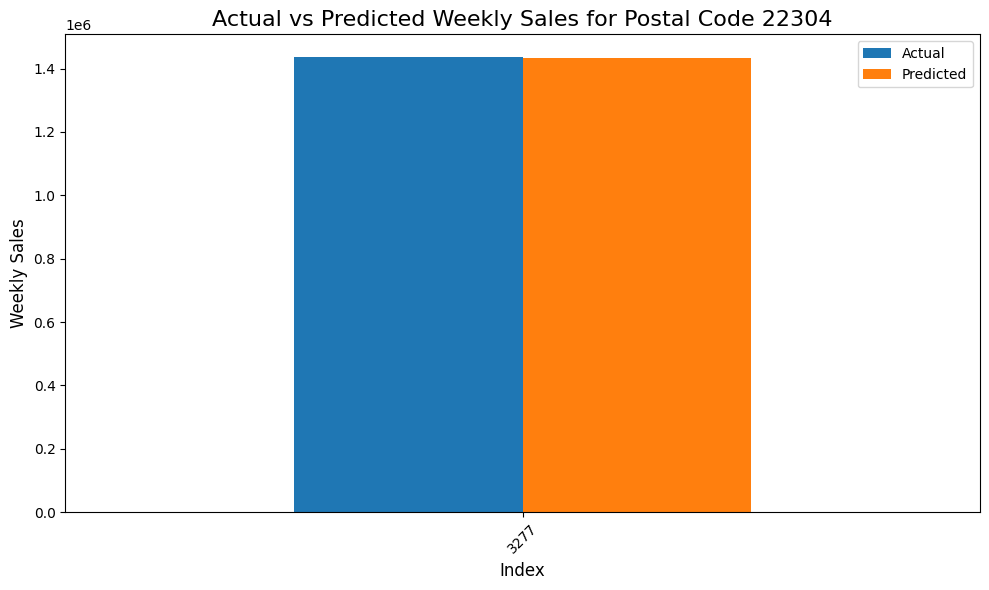

In [25]:
# Let's pick a different postal code from the test set
postal_code_to_predict = 22304

# Filter the test set for that specific postal code
X_test_postal = X_test[X_test['Postal Code'] == postal_code_to_predict]

# Check if the filtered test set is empty
if not X_test_postal.empty:
    # Make predictions for the selected postal code
    y_pred_postal = rf.predict(X_test_postal)

    # Get the corresponding actual values for the selected postal code
    y_test_postal = y_test[X_test['Postal Code'] == postal_code_to_predict]

    # Create a DataFrame for actual vs predicted values
    results_postal_df = pd.DataFrame({'Actual': y_test_postal, 'Predicted': y_pred_postal})

    # Display the results
    print(results_postal_df)

    # Visualization: Actual vs Predicted Weekly Sales for the Postal Code
    plt.figure(figsize=(10, 6))

    # Plot actual and predicted values side by side
    results_postal_df.plot(kind='bar', figsize=(10, 6))

    plt.title(f'Actual vs Predicted Weekly Sales for Postal Code {postal_code_to_predict}', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Weekly Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(['Actual', 'Predicted'])

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for postal code {postal_code_to_predict} in the test set.")


In [21]:
# Print all the column names to ensure there is a column named 'Postal Code'
print(list(df.columns))

['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Postal Code', 'Year', 'Month', 'Day', 'Weekday', 'Quarter', 'Week_of_Year', 'Day_Name']


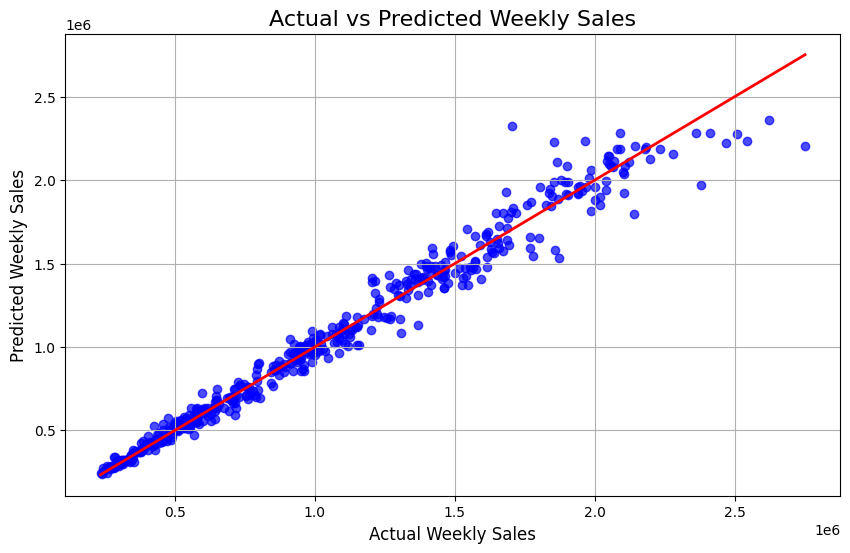

In [22]:

# 1. Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title('Actual vs Predicted Weekly Sales', fontsize=16)
plt.xlabel('Actual Weekly Sales', fontsize=12)
plt.ylabel('Predicted Weekly Sales', fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Diagonal line
plt.grid(True)
plt.show()

# 2. Error Dist